# 📧 Spam Email Filter Model using NLP: 🛡️

This `notebook` demonstrates an end-to-end spam email classifier using Natural Language Processing (NLP) and machine learning. 

The model is trained using `Naive Bayes`

## 🗃️ Dataset Overview:
- The dataset contains two classes: The subject of each email and if whether it is spam or not (0 or 1).
- There are 5728 non-null columns
- 23% of these are Spam (1) and remaining 76% are Non-Spam (0)


## 📦 Import Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## 🧪 Import Dataset:

In [2]:
spam_df = pd.read_csv('emails.csv')
spam_df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [3]:
spam_df.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [4]:
spam_df.tail(10)

,text,spam
5718,"Subject: altos na gas model kim , i know you ...",0
5719,Subject: power market research i came across ...,0
5720,Subject: re : visit to houston fyi - - - - -...,0
5721,Subject: ees risk management presentations for...,0
5722,Subject: re : vacation vince : i just found ...,0
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [5]:
# Summary of the dataset:
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [6]:
# Insights from the dataset useful for EDA (if needed):
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [7]:
 # Grouping the data by spam and non-spam:

# This is for non spam emails:
ham = spam_df[spam_df['spam'] == 0]
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [8]:
# This for spam emails:
spam = spam_df[spam_df['spam'] == 1]
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [9]:
# Printing percentage of spam and non-spam emails:
print('Spam Percentage: ', (len(spam)/len(spam_df))*100, '%')
print('Non Spam Percentage: ', (len(ham)/len(spam_df))*100, '%')

Spam Percentage:  23.88268156424581 %
Non Spam Percentage:  76.11731843575419 %


<Axes: xlabel='spam', ylabel='count'>

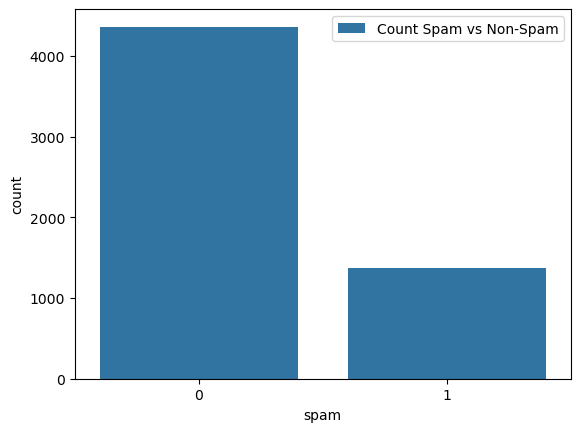

In [10]:
# To get and plot the data points:
sns.countplot(data=spam_df, x='spam', label = 'Count Spam vs Non-Spam')


## 🔢🧠 Count Vectorizer:

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
spamham_countvectorizer = vectorizer.fit_transform(spam_df['text'])

In [12]:
# Get features:
print(vectorizer.get_feature_names_out())

['00' '000' '0000' ... 'zzn' 'zzncacst' 'zzzz']


In [13]:
# Converting in an array:
print(spamham_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [14]:
# 5728 colums and 37303 words/features extracted from the dataset:
spamham_countvectorizer.shape

(5728, 37303)

## 🏋️ Model Training:

- Strategy-1: We train the model on all data and create new data to test it upon

- Strategy-2: We divide the dataset into training data and testing data and then train the model.

- Train the model using Naive Bayes:

In [15]:
# Store the values of the spam column:
label = spam_df['spam'].values
label

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

**Strategy-1:** Train the model on all data and create new data to test it upon

In [16]:
# Naive Bayes Classifier Training Pipeline:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(spamham_countvectorizer, label)    # (input,output)


MultinomialNB()

In [17]:
# We test first with a test sample (spam, no spam):
testing_sample = ['Free Money Now!!!', 'Hi, I am a student and I need help with my assignment']
testing_sample_countvectorizer = vectorizer.transform(testing_sample)

Prediction is correct as first element in array is spam and second is no spam:

In [18]:
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([1, 0], dtype=int64)

In [20]:
testing_sample2 = [ "Hi, Please find the attached document", "Get a free trial of our product"]
testing_sample2_countvectorizer = vectorizer.transform(testing_sample2)
test_predict2 = NB_classifier.predict(testing_sample2_countvectorizer)
test_predict2

array([0, 1], dtype=int64)

**Strategy-2:** Divide the dataset into training data and testing data and then train the model.

In [21]:
X = spamham_countvectorizer  # Input
y = label  # Output

print(X.shape)
print(y.shape)

(5728, 37303)
(5728,)


In [22]:
# Data Split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [23]:
# Naive Bayes Classifier Training Pipeline:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

## 📈🔬 Model Evaluation:

This involves the evaluation of training done in strategy-2:

We predict first the training data and get a confusion matrix for it, then we predict the testing data and get a confusion matrix for it.

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [25]:
# Predicting the training data:
y_predict_train = NB_classifier.predict(X_train)
y_predict_train

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

Light colours mean number of correctly classified for the classes and dark means number of misclassifications for the classes:

<Axes: >

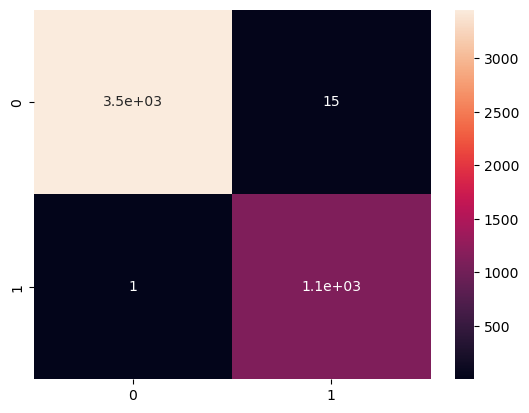

In [26]:
# Confusion Matrix for training data predictions:
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True)

In [27]:
# Predicting the testing data:
y_predict_test = NB_classifier.predict(X_test)
y_predict_test

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

<Axes: >

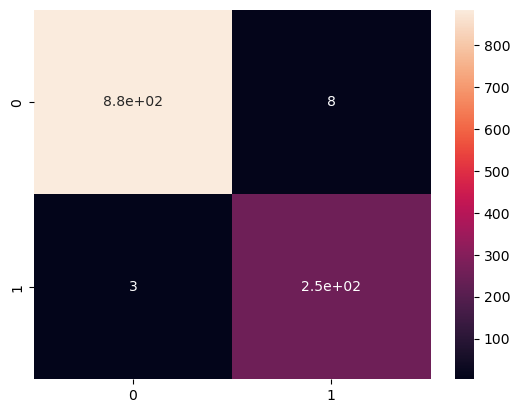

In [28]:
# Confusion Matrix for testing data predictions:
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [29]:
# Print the Accuracy and classification report for the testing data predictions:
print(f"Accuracy: {accuracy_score(y_test, y_predict_test)}")
print(classification_report(y_test, y_predict_test))

Accuracy: 0.9904013961605584
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       892
           1       0.97      0.99      0.98       254

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

